In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [5]:
#step 2: Creating time-series data
def create_dataset(data, time_steps=5):
    X, y= [],[]
    for i in range (len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [7]:
#sample temperature data
temperatures = np.array([30,31,32,33,34,35,36,37,39])
X, y= create_dataset(temperatures, time_steps=3)
#reshape for rnn : (Samples.time_steps, features)
X= X.reshape((X.shape[0], X.shape[1], 1))

In [16]:
#step 3: build RNN model
model =Sequential ([ SimpleRNN(20, activation= 'tanh', input_shape = (3,1)), Dense(1)])
model.compile(optimizer='adam', loss = 'mse')
model.summary()
#step 4: Train the model
model.fit(X, y,epochs= 200, verbose=0)
#step 5 : predict tomorrow's temperature
last_days = np.array([[37,38,39]])
last_days = last_days.reshape((1,3,1))
prediction = model.predict(last_days)
print("Predicted temperature :" , prediction[0][0])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted temperature : 9.413699


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4, 3, 1)
X_test shape: (2, 3, 1)
y_train shape: (4,)
y_test shape: (2,)


In [18]:
history = model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.2)
print("Model training complete. History captured.")

Model training complete. History captured.


In [20]:
import matplotlib.pyplot as plt
print("matplotlib.pyplot imported as plt.")

matplotlib.pyplot imported as plt.


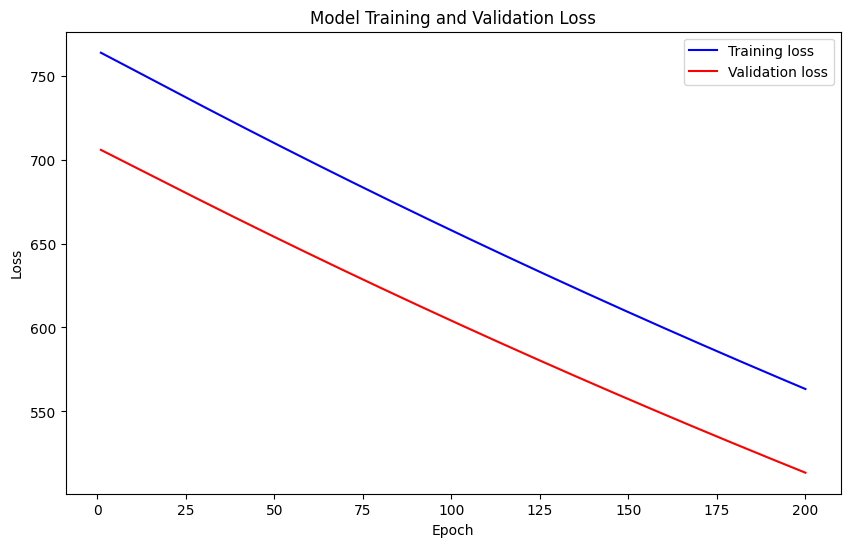

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()